In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
np.set_printoptions(threshold=300)

In [3]:
from proj1_helpers import load_csv_data, predict_labels, create_csv_submission
from implement import modeling
from preprocessing import dataprocessing, split_categories
from other import plot_train_test
import math

## Load and process data

Load data

In [4]:
y_train, x_train, ids_train = load_csv_data('train.csv', sub_sample=False)
_,      x_test,   ids_test  = load_csv_data('test.csv',  sub_sample=False)

Create categories

In [9]:
cat_0_tri, cat_1_tri, cat_2_tri, cat_3_tri, idx_0_tr, idx_1_tr, idx_2_tr, idx_3_tr = split_categories(x_train)
cat_0_tei, cat_1_tei, cat_2_tei, cat_3_tei, idx_0_te, idx_1_te, idx_2_te, idx_3_te = split_categories(x_test)

y_train_0 = y_train[idx_0_tr]
y_train_1 = y_train[idx_1_tr] 
y_train_2 = y_train[idx_2_tr]
y_train_3 = y_train[idx_3_tr]

Preprocess the data, create features

In [22]:
trx_0, tex_0= dataprocessing(cat_0_tri,cat_0_tei,idx_0_tr,idx_0_te,deg0=1,adddegree0=0,sqrt0=0,comb0=0)

In [34]:
trx_1, tex_1= dataprocessing(cat_1_tri,cat_1_tei,idx_1_tr,idx_1_te,deg0=1,adddegree0=0,sqrt0=0,comb0=0)

In [35]:
trx_2, tex_2= dataprocessing(cat_2_tri,cat_2_tei,idx_2_tr,idx_2_te,deg0=1,adddegree0=0,sqrt0=0,comb0=0)

In [36]:
trx_3, tex_3= dataprocessing(cat_3_tri,cat_3_tei,idx_3_tr,idx_3_te,deg0=1,adddegree0=0,sqrt0=0,comb0=0)

## Ridge regression Lambda

Define the parameters of the algorithm

The best lambda is 0.01 with valid test 0.26496961425686544
And the loss on the whole train data is 0.8856592525260666


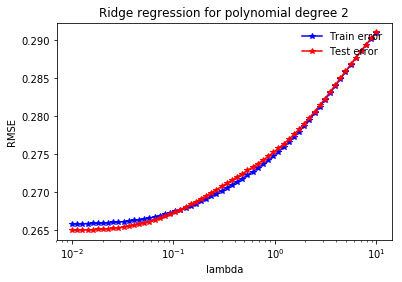

In [31]:
w_best_0 = modeling(trx_0,y_train_0,num_intervals_lambda=60, nb_fold=10,nb_crossvalid=3,min_range=-2,max_range=1)

The best lambda is 0.01 with valid test 0.2721237297542953
And the loss on the whole train data is 0.9093919708776114


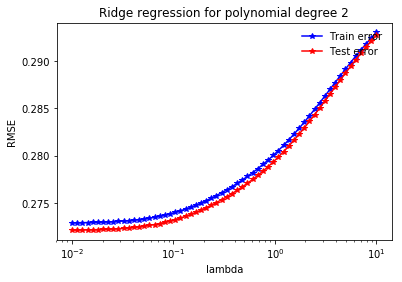

In [37]:
w_best_1 = modeling(trx_1,y_train_1,num_intervals_lambda=60, nb_fold=10,nb_crossvalid=3,min_range=-2,max_range=1)

The best lambda is 0.01 with valid test 0.25310772887469624
And the loss on the whole train data is 0.8435201337555966


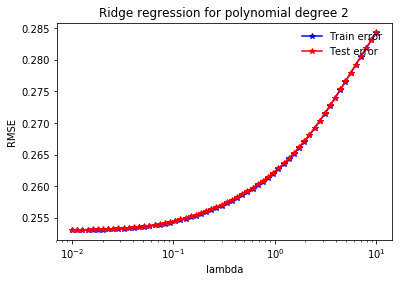

In [38]:
w_best_2 = modeling(trx_2,y_train_2,num_intervals_lambda=60, nb_fold=10,nb_crossvalid=3,min_range=-2,max_range=1)

The best lambda is 0.01 with valid test 0.28119537339577527
And the loss on the whole train data is 0.9344569292122706


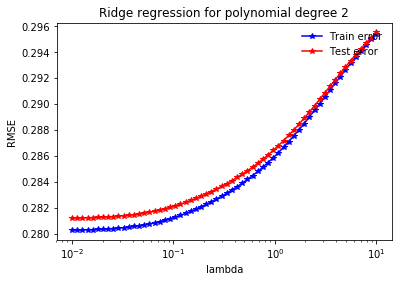

In [39]:
w_best_3 = modeling(trx_3,y_train_3,num_intervals_lambda=60, nb_fold=10,nb_crossvalid=3,min_range=-2,max_range=1)

## Prediction with the best model

Create prediction for each category

In [40]:
y_0_te = predict_labels(w_best_0,tex_0)
y_1_te = predict_labels(w_best_1,tex_1)
y_2_te = predict_labels(w_best_2,tex_2)
y_3_te = predict_labels(w_best_3,tex_3)

Reconstruct y in order

In [41]:
order_tab = np.concatenate((idx_0_te, idx_1_te, idx_2_te, idx_3_te))
order_idx = np.argsort(order_tab, axis=0)
y_unordered = np.concatenate((y_0_te, y_1_te, y_2_te, y_3_te))
y_pred = y_unordered[order_idx]

Create submission

In [43]:
create_csv_submission(ids_test, y_pred, "submission.csv")